<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#One-hot-encoding-of-words-and-characters" data-toc-modified-id="One-hot-encoding-of-words-and-characters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>One-hot encoding of words and characters</a></span><ul class="toc-item"><li><span><a href="#Word-level-one-hot-encoding" data-toc-modified-id="Word-level-one-hot-encoding-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Word-level one-hot encoding</a></span></li><li><span><a href="#Character-level-one-hot-encoding" data-toc-modified-id="Character-level-one-hot-encoding-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Character-level one-hot encoding</a></span></li><li><span><a href="#Using-Keras-for-word-level-one-hot-encoding" data-toc-modified-id="Using-Keras-for-word-level-one-hot-encoding-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Using Keras for word-level one-hot encoding</a></span></li><li><span><a href="#Word-level-one-hot-encoding-with-hashing-trick" data-toc-modified-id="Word-level-one-hot-encoding-with-hashing-trick-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Word-level one-hot encoding with hashing trick</a></span></li></ul></li><li><span><a href="#Using-word-embeddings" data-toc-modified-id="Using-word-embeddings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using word embeddings</a></span><ul class="toc-item"><li><span><a href="#Instatiating-an-Embedding-layer" data-toc-modified-id="Instatiating-an-Embedding-layer-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Instatiating an Embedding layer</a></span></li><li><span><a href="#Loading-the-IMDB-data-for-use-with-an-Embedding-layer" data-toc-modified-id="Loading-the-IMDB-data-for-use-with-an-Embedding-layer-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Loading the IMDB data for use with an <code>Embedding</code> layer</a></span></li><li><span><a href="#Using-an-Embedding-layer-and-classifier-on-the-IMDB-data" data-toc-modified-id="Using-an-Embedding-layer-and-classifier-on-the-IMDB-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Using an <code>Embedding</code> layer and classifier on the IMDB data</a></span></li></ul></li><li><span><a href="#Using-Pretrained-word-Embedding" data-toc-modified-id="Using-Pretrained-word-Embedding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using Pretrained word Embedding</a></span><ul class="toc-item"><li><span><a href="#Processing-the-labels-of-the-raw-IMDB-data" data-toc-modified-id="Processing-the-labels-of-the-raw-IMDB-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Processing the labels of the raw IMDB data</a></span></li><li><span><a href="#Tokenizing-the-data" data-toc-modified-id="Tokenizing-the-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tokenizing the data</a></span></li><li><span><a href="#Parsing-the-Glove-word-embeddings-file" data-toc-modified-id="Parsing-the-Glove-word-embeddings-file-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Parsing the Glove word-embeddings file</a></span></li><li><span><a href="#Preparing-the-Glove-word-embeddings-matrix" data-toc-modified-id="Preparing-the-Glove-word-embeddings-matrix-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Preparing the Glove word-embeddings matrix</a></span></li><li><span><a href="#Defining-a-model" data-toc-modified-id="Defining-a-model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Defining a model</a></span></li><li><span><a href="#Loading-pretrained-word-embeddings-into-the-Embedding-layer" data-toc-modified-id="Loading-pretrained-word-embeddings-into-the-Embedding-layer-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Loading pretrained word embeddings into the <code>Embedding</code> layer</a></span></li><li><span><a href="#Training-and-Evaluation" data-toc-modified-id="Training-and-Evaluation-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Training and Evaluation</a></span></li><li><span><a href="#Training-the-same-model-without-pretrained-word-embeddings" data-toc-modified-id="Training-the-same-model-without-pretrained-word-embeddings-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Training the same model without pretrained word embeddings</a></span></li><li><span><a href="#Tokenizing-the-data-of-the-test-set" data-toc-modified-id="Tokenizing-the-data-of-the-test-set-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Tokenizing the data of the test set</a></span></li><li><span><a href="#Evaluating-the-model-on-the-test-set" data-toc-modified-id="Evaluating-the-model-on-the-test-set-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Evaluating the model on the test set</a></span></li></ul></li></ul></div>

Text can be understood as either a sequence of characters or a sequence of words, but it is most common to work at the level of words.

Like all the other neural networks, deep-learning models don't take as input raw text: they only work with numeric tensors. Vectorizing text is the process of transforming text
into numeric tensors. This can be done in multiple ways:
1. Segment text into words, and transform each word into a vector.
2. Segment text into characters, and transform each character into a vector.
3. Extract n-grams of words or characters, and transform each n-gram into a vector. N-grams are overlapping groups of multiple consecutive words or characters.

Collectively, the different units into which you can break down text (words, characters, or n-grams) are called **tokens**, and breaking text into such tokens is called **tokenization**. 


# One-hot encoding of words and characters

- Consists of associating a unique integer index with every word and then turning this integer index *i* into a binary vector of size *N* (the size of the vocabulary).

In [1]:
import numpy as np

## Word-level one-hot encoding

In [2]:
# Initial data: one entry per sample (in this example, a sample is a sentence, but it could be an entire document)
samples = ["The cat sat on the mat.", "The dog ate my homework."]

In [3]:
token_index = {}

In [4]:
for sample in samples:
    # Tokenizes the samples via the split method. In real life, you'd also strip punctuation and special characters from the samples.
    for word in sample.split():
        if word not in token_index:
            # Assigns a unique index to each unique word. Note that you don't attribute index 0 to anything
            token_index[word] = len(token_index) + 1

In [5]:
max_length = 10  # Vectorizes the samples. You will only consider the first max_length words in each sample

In [6]:
results = np.zeros(shape=(len(samples), max_length,
                          max(token_index.values()) + 1))  # This is where you store the results

In [7]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [8]:
results

array([[[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,

## Character-level one-hot encoding

In [9]:
import string

In [10]:
samples = ["The cat sat on the mat.", "The dog ate my homework."]

In [11]:
characters = string.printable # All printable ASCII characters
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [12]:
max_length = 50
token_index = dict(zip(range(1, len(characters) + 1), characters))

In [13]:
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
results.shape

(2, 50, 101)

In [14]:
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [15]:
results

array([[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

## Using Keras for word-level one-hot encoding

In [16]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [17]:
samples = ["The cat sat on the mat.", "The dog ate my homework."]

In [18]:
# Create a tokenizer, configured to only take into account the 1,000 most common words
tokenizer = Tokenizer(num_words=1000)

In [19]:
# Build the word index
tokenizer.fit_on_texts(samples)

In [20]:
# Turn strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)

In [21]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [22]:
one_hot_results

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [23]:
one_hot_results.shape

(2, 1000)

In [24]:
# How you can recover the word index that was computed
word_index = tokenizer.word_index

In [25]:
print("Found {} unique tokens. ".format(len(word_index)))

Found 9 unique tokens. 


## Word-level one-hot encoding with hashing trick

A variant of one-hot encoding is the so called **one-hot hashing trick**, which you can use when the number of unique tokens in your vocabulary is too large to handle explicitly. Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, you can hash words into vectors of fixed size. This is typically done with a very lightweight hashing function. The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding of the data. The one drawback of this approach is that it is susceptible to **hash collisions**. 

In [26]:
# Store the words as vectors of size 1,000. If you have close to 1, 000 words (or more), you will see many hash collisions, which will decrease the accuracy of this encoding mthod.
dimensionality = 1000
max_length = 10

In [27]:
results = np.zeros((len(samples), max_length, dimensionality))

In [28]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hashes the word into a random integer index between 0 and 1,000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

# Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense word vectors, also called **word embeddings**. 

Whereas the vectors obtained through one-hot encoding are:
- binary, 
- sparse (mostly made of zeros), 
- and very high-dimensional

word embeddings are:
- low dimensional floating-point vectors
- dense vectors

Unlike the word vectors obtained via one-hot encoding, word embeddings are learned from data.

There are two ways to obtain word embeddings:
- Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors in the same way you learn the weights of a neural network. 
- Load into your model word embeddings that were precomputed using a different ML task than the one you are trying to solve. These are called **pretrained word embeddings**. 

## Instatiating an Embedding layer

In [29]:
from keras.layers import Embedding

In [30]:
# The Embedding layer takes at least two arguments: the number of possibl                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 e tokens (here, 1000: 1 + max word index) and the dimensionality of the embeddings (here, 64)
embedding_layer = Embedding(1000, 64)

## Loading the IMDB data for use with an ```Embedding``` layer

In [31]:
from keras.datasets import imdb
from keras import preprocessing

In [32]:
# Number of words to consider as features
max_features = 10000
# Cuts off the text after this number of words(among the max_features most common words)
maxlen = 20

In [33]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [34]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

## Using an ```Embedding``` layer and classifier on the IMDB data

In [35]:
from keras import models
from keras import layers

In [36]:
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [38]:
%%time
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 223us/step - loss: 0.6690 - acc: 0.6187 - val_loss: 0.6145 - val_acc: 0.7032
Epoch 2/10
20000/20000 [==============================] - 4s 178us/step - loss: 0.5452 - acc: 0.7455 - val_loss: 0.5163 - val_acc: 0.7420
Epoch 3/10
20000/20000 [==============================] - 3s 169us/step - loss: 0.4646 - acc: 0.7869 - val_loss: 0.4870 - val_acc: 0.7584
Epoch 4/10
20000/20000 [==============================] - 3s 164us/step - loss: 0.4233 - acc: 0.8091 - val_loss: 0.4805 - val_acc: 0.7646
Epoch 5/10
20000/20000 [==============================] - 3s 163us/step - loss: 0.3947 - acc: 0.8235 - val_loss: 0.4796 - val_acc: 0.7684
Epoch 6/10
20000/20000 [==============================] - 3s 170us/step - loss: 0.3716 - acc: 0.8375 - val_loss: 0.4834 - val_acc: 0.7706
Epoch 7/10
20000/20000 [==============================] - 3s 165us/step - loss: 0.3514 - acc: 0.8504 - val_loss: 0.4890 - v

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [40]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation')
    plt.legend()
    plt.show()


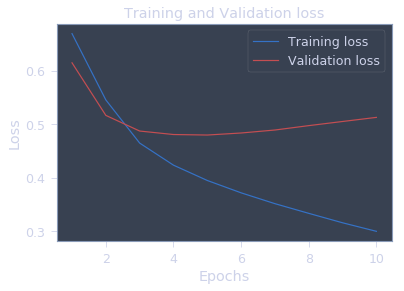

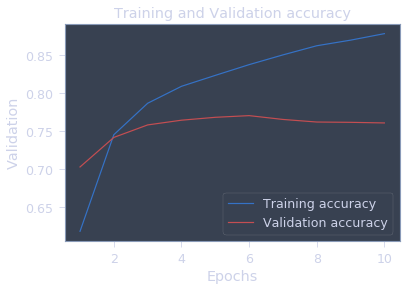

In [41]:
plot_history(history)

We get to a validation accuracy of ~76%, which is pretty good considering that we are only looking at the first 20 words in every review. But note that merely flattening the embedded sequences and training a single **Dense** layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure. It is much better to add recurrent layers or 1D conv layers on top of the embedded sequences to learn features that take into account each sequence as a whole. 

# Using Pretrained word Embedding

## Processing the labels of the raw IMDB data

In [75]:
import os

In [76]:
imdb_dir = "/home/abanihi/Downloads/aclImdb"
train_dir = os.path.join(imdb_dir, 'train')

In [77]:
labels = []
texts = []

In [78]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)

            else:
                labels.append(1)

## Tokenizing the data

Because pretrained word embeddings are meant to be particularly useful on problems where little training data is available(otherwise, task specific embeddings are likely to outperform them). 
We will add the following twist: restricting the training data to the first 3000 samples. So we will learn to classify movie reviews after looking at just 200 examples. 

In [79]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [98]:
maxlen = 100  # Cuts off reviews after 100 words
training_samples = 3000  # Trains on 3000 samples
validation_samples = 10000
max_words = 10000

In [99]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [100]:
word_index = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_index)))

Found 88582 unique tokens.


In [101]:
data = pad_sequences(sequences, maxlen=maxlen)

In [102]:
labels = np.asarray(labels)

In [103]:
data.shape

(25000, 100)

In [104]:
labels.shape

(25000,)

In [105]:
indices = np.arange(data.shape[0])

In [106]:
np.random.shuffle(indices)

In [107]:
data = data[indices]
labels = labels[indices]

In [108]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

## Parsing the Glove word-embeddings file

In [61]:
glove_dir = "/home/abanihi/Downloads/glove"

In [62]:
embeddings_index = {}

In [63]:
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

In [64]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

In [65]:
f.close()

In [66]:
print('Found {} word vectors.'.format(len(embeddings_index)))

Found 400000 word vectors.


## Preparing the Glove word-embeddings matrix

In [67]:
embedding_dim = 100


In [68]:
embedding_matrix = np.zeros((max_wordsds, embedding_dim))

In [69]:
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

## Defining a model

In [127]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Loading pretrained word embeddings into the ```Embedding``` layer

In [128]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

## Training and Evaluation

In [129]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [132]:
%%time
history_2 = model.fit(x_train, y_train, epochs=15,
                    batch_size=32, validation_data=(x_val, y_val))

Train on 3000 samples, validate on 10000 samples
Epoch 1/15
3000/3000 [==============================] - 2s 516us/step - loss: 0.1282 - acc: 0.9610 - val_loss: 1.2907 - val_acc: 0.5022
Epoch 2/15
3000/3000 [==============================] - 2s 537us/step - loss: 0.0972 - acc: 0.9733 - val_loss: 1.5175 - val_acc: 0.5001
Epoch 3/15
3000/3000 [==============================] - 2s 539us/step - loss: 0.0754 - acc: 0.9753 - val_loss: 1.4696 - val_acc: 0.5029
Epoch 4/15
3000/3000 [==============================] - 2s 524us/step - loss: 0.0708 - acc: 0.9820 - val_loss: 1.5723 - val_acc: 0.5002
Epoch 5/15
3000/3000 [==============================] - 2s 580us/step - loss: 0.0521 - acc: 0.9877 - val_loss: 1.7174 - val_acc: 0.5092
Epoch 6/15
3000/3000 [==============================] - 2s 515us/step - loss: 0.0462 - acc: 0.9847 - val_loss: 1.9008 - val_acc: 0.5014
Epoch 7/15
3000/3000 [==============================] - 2s 549us/step - loss: 0.0584 - acc: 0.9850 - val_loss: 1.8165 - val_acc: 0.5008

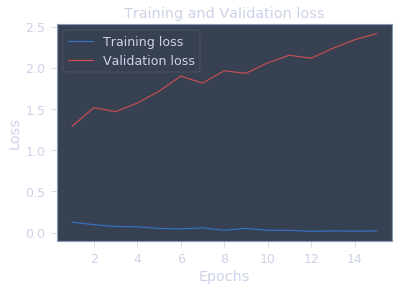

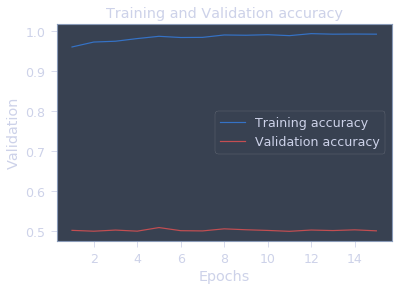

In [133]:
plot_history(history_2)

In [134]:
model.save_weights('pretrained_glove_model.h5')

## Training the same model without pretrained word embeddings

In [115]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [117]:
%%time
history_3 = model.fit(x_train, y_train, epochs=10,
                    batch_size=32, validation_data=(x_val, y_val))

Train on 3000 samples, validate on 10000 samples
Epoch 1/10
3000/3000 [==============================] - 2s 813us/step - loss: 0.6936 - acc: 0.5063 - val_loss: 0.6944 - val_acc: 0.5059
Epoch 2/10
3000/3000 [==============================] - 2s 782us/step - loss: 0.4021 - acc: 0.9207 - val_loss: 0.7824 - val_acc: 0.5052
Epoch 3/10
3000/3000 [==============================] - 2s 792us/step - loss: 0.0633 - acc: 0.9900 - val_loss: 0.9569 - val_acc: 0.5087
Epoch 4/10
3000/3000 [==============================] - 2s 809us/step - loss: 0.0052 - acc: 0.9993 - val_loss: 1.1613 - val_acc: 0.5091
Epoch 5/10
3000/3000 [==============================] - 2s 768us/step - loss: 2.2181e-04 - acc: 1.0000 - val_loss: 1.3859 - val_acc: 0.5099
Epoch 6/10
3000/3000 [==============================] - 3s 843us/step - loss: 1.0183e-05 - acc: 1.0000 - val_loss: 1.6444 - val_acc: 0.5083
Epoch 7/10
3000/3000 [==============================] - 2s 746us/step - loss: 3.7470e-07 - acc: 1.0000 - val_loss: 1.8125 - val

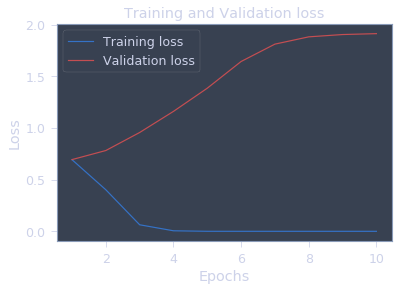

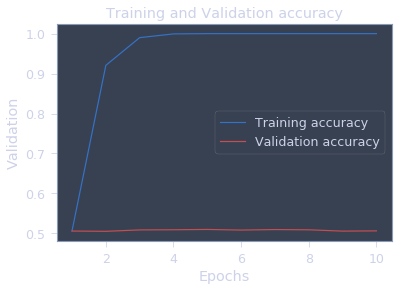

In [118]:
plot_history(history_3)

## Tokenizing the data of the test set

In [119]:
test_dir = os.path.join(imdb_dir, 'test')

In [120]:
labels = []
texts = []

In [121]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)

            else:
                labels.append(1)

In [122]:
sequences = tokenizer.texts_to_sequences(texts)

In [123]:
x_test = pad_sequencesquencesquencesquences(sequences, maxlen=maxlen)

In [124]:
y_test = np.asarray(labels)

## Evaluating the model on the test set

In [135]:
model.load_weights('pretrained_glove_model.h5')

In [136]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 88us/step


[2.4731970547485354, 0.49320000000000003]

In [137]:
%load_ext version_information
%version_information keras, numpy, matplotlib, tensorflow

Software versions
Python 3.6.4 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
keras 2.0.9
numpy 1.12.1
matplotlib 2.1.1
tensorflow 1.3.0
Sat Jan 06 03:02:07 2018 CST